In [1]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
session = fastf1.get_session(2023, 'Las Vegas', 'R')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\puja2\AppData\Local\Temp\fastf1.
	Size: 486.3 MB
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '31', '18', '55', '44', '63', '14', '

In [3]:
lap_lec = session.laps.pick_driver("LEC")[session.laps.pick_driver("LEC")['LapNumber'] == 50.0].get_car_data().add_distance()
lap_per = session.laps.pick_driver("PER")[session.laps.pick_driver("PER")['LapNumber'] == 50.0].get_car_data().add_distance()

In [6]:
lap_per

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-11-19 07:31:39.668,11248,316,8,100,False,0,car,0 days 00:00:00.218000,0 days 01:41:37.451000,19.135556
1,2023-11-19 07:31:40.108,11212,317,8,100,False,0,car,0 days 00:00:00.658000,0 days 01:41:37.891000,57.880000
2,2023-11-19 07:31:40.428,11120,315,8,100,False,0,car,0 days 00:00:00.978000,0 days 01:41:38.211000,85.880000
3,2023-11-19 07:31:40.628,11120,315,8,100,False,0,car,0 days 00:00:01.178000,0 days 01:41:38.411000,103.380000
4,2023-11-19 07:31:40.789,11069,313,8,100,False,0,car,0 days 00:00:01.339000,0 days 01:41:38.572000,117.378056
...,...,...,...,...,...,...,...,...,...,...,...
364,2023-11-19 07:33:14.709,11367,319,8,91,False,0,car,0 days 00:01:35.259000,0 days 01:43:12.492000,6040.956667
365,2023-11-19 07:33:14.949,11357,320,8,100,False,0,car,0 days 00:01:35.499000,0 days 01:43:12.732000,6062.290000
366,2023-11-19 07:33:15.148,11355,320,8,100,False,0,car,0 days 00:01:35.698000,0 days 01:43:12.931000,6079.978889
367,2023-11-19 07:33:15.428,11429,321,8,100,False,0,car,0 days 00:01:35.978000,0 days 01:43:13.211000,6104.945556


In [ ]:
def tel_plot(axs, lap, team, circuit):
    color = fastf1.plotting.team_color(team)
    axs[0].plot(lap['Distance'], lap['Speed'], color=color, label=f"Speed {team}")
    axs[1].plot(lap['Distance'], lap['Throttle'], color=color, label=f"Throttle {team}")
    axs[2].plot(lap['Dist ance'], lap['Brake'], color=color, label=f"Brake {team}")
    axs[3].plot(lap['Distance'], lap['RPM'], color=color, label=f"RPM {team}")
    axs[4].plot(lap['Distance'], lap['nGear'], color=color, label=f"Gear {team}")

    for i in range(5):
        axs[i].set_ylabel(["Speed", "Throttle", "Brake", "RPM", "Gear"][i])
        axs[i].legend()
    
    corners = list(circuit.corners['Number']) 
    dist = list(circuit.corners['Distance'])
    
    #for corners, dist in zip(corners, dist):
        #axs[-1].text(dist, 0, f'{corners}', verticalalignment='bottom', horizontalalignment='center')

#fastf1.plotting.setup_mpl(misc_mpl_mods=True)
    
fig, axs = plt.subplots(5, 1, figsize=(16,12), sharex=True)

circuit_info = session.get_circuit_info()

tel_plot(axs,lap_lec, "FER", circuit_info)
tel_plot(axs,lap_per, "RBR", circuit_info)

plt.tight_layout()
plt.show()

In [ ]:
pos = session.laps.pick_driver("LEC").pick_fastest().get_pos_data()
circuit_info = session.get_circuit_info()

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

track = pos.loc[:, ('X', 'Y')].to_numpy()
track_angle = circuit_info.rotation / 180 * np.pi
rotated_track = rotate(track, angle=track_angle)

plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

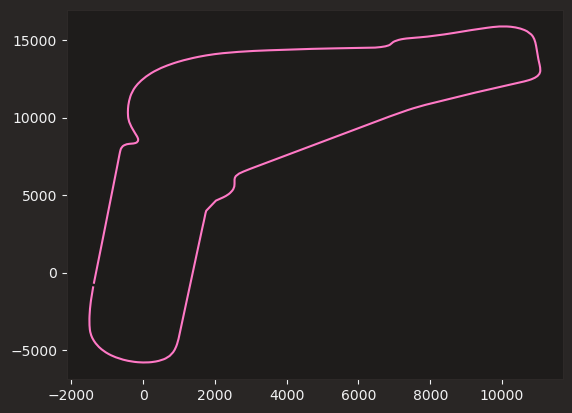

In [37]:
track[0]

array([-1372,  -656], dtype=int64)